In [20]:
!pip3 install matplotlib
!pip3 install numpy
!pip3 install shapely

  Using cached shapely-2.0.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (7.0 kB)
Using cached shapely-2.0.4-cp312-cp312-macosx_10_9_x86_64.whl (1.4 MB)


In [30]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import shapely.geometry as sg
from shapely.geometry import MultiPolygon

epsilon = 10e-7

In [31]:
def nlevels(poly):
    return len(np.unique([i[3] for i in poly]))

def nspaces(poly):
    
    #list_spaces: [1 2 3]
    list_spaces = np.unique([i[4] for i in poly])

    if 0 in list_spaces:
        nspaces = len(list_spaces) - 1
    else:
        nspaces = len(list_spaces)
    
    return nspaces

In [32]:
def vis_poly(poly):
    n = 1
    colors = ['white', 'thistle', 'cornflowerblue', "skyblue", "pink", "mediumslateblue", "lightseagreen", 'plum', 'lightsteelblue', 'paleturquoise']

    for l in range(nlevels(poly)):

        plt.figure(figsize=(5,7))
        plt.subplot(int(str(nlevels(poly)) + str(1) + str(n)))

        m = 0

        #A = all cells on level l 
        A = []
        for i in poly:
            if i[3] == l:
                m+=1
                A.append(i)


        for t in range(nspaces(poly)+1):
            

            #r - list of polygons 
            r = []
            for i in range(len(A)):
                if A[i][4] == t:
                    r.append(sg.Polygon([(A[i][0][0], A[i][0][1]), (A[i][1][0], A[i][1][1]), (A[i][2][0], A[i][2][1])]))
            

            new_shape = MultiPolygon(r)
            for z in range(len(new_shape.geoms)):
#                 print(i)
                res = [list(ele) for ele in list(new_shape.geoms[z].exterior.coords[:-1])]
#                 print(l, t)
                res.append(l)
                res.append(t)
                index = 0
#                 print(res)
                for b in range(len(poly)):
                    if (np.abs(res[0][0] - poly[b][0][0]) < epsilon) and (np.abs(res[0][1] - poly[b][0][1]) < epsilon) and (np.abs(res[1][0] - poly[b][1][0]) < epsilon) and (np.abs(res[1][1] - poly[b][1][1]) < epsilon) and (np.abs(res[2][0] - poly[b][2][0]) < epsilon) and (np.abs(res[2][1] - poly[b][2][1]) < epsilon) and (np.abs(res[3] - poly[b][3]) < epsilon) and (np.abs(res[4] - poly[b][4]) < epsilon):
                        index = b
                
                xs, ys = new_shape.geoms[z].exterior.xy 
                plt.plot(xs, ys, color = 'k')
                plt.fill(xs, ys, facecolor= colors[t], edgecolor = 'black')
                plt.ylabel('Level ' + str(l))
                #with or without numbers
 #               plt.annotate(str(index), xy = [new_shape.geoms[z].centroid.x, new_shape.geoms[z].centroid.y], xytext=[new_shape.geoms[z].centroid.x, new_shape.geoms[z].centroid.y])
                
          
        plt.show()
        n += 1
    plt.show()

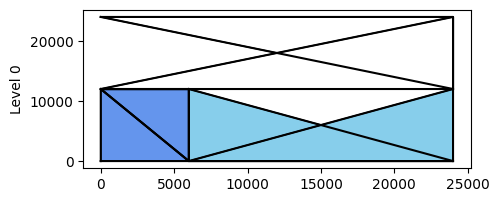

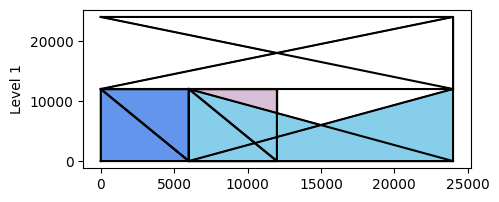

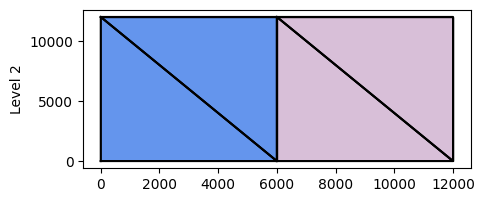

In [42]:
building =  [[[0, 24000], [24000, 12000], [24000, 24000], 0, 0], [[0, 24000], [24000, 12000], [24000, 24000], 1, 0], [[24000, 12000], [0, 12000], [24000, 24000], 0, 0], [[24000, 12000], [0, 12000], [24000, 24000], 1, 0], [[6000, 0], [6000, 12000], [12000, 0], 1, 1], [[6000, 0], [6000, 12000], [12000, 0], 2, 1], [[6000, 12000], [12000, 12000], [12000, 0], 1, 1], [[6000, 12000], [12000, 12000], [12000, 0], 2, 1], [[0, 0], [0, 12000], [6000, 0], 0, 2], [[0, 0], [0, 12000], [6000, 0], 1, 2], [[0, 0], [0, 12000], [6000, 0], 2, 2], [[0, 12000], [6000, 12000], [6000, 0], 0, 2], [[0, 12000], [6000, 12000], [6000, 0], 1, 2], [[0, 12000], [6000, 12000], [6000, 0], 2, 2], [[6000, 12000], [24000, 0], [6000, 0], 0, 3], [[6000, 12000], [24000, 0], [6000, 0], 1, 3], [[24000, 0], [24000, 12000], [6000, 0], 0, 3], [[24000, 0], [24000, 12000], [6000, 0], 1, 3]]
building2 = [[[12000, -6000], [12000, 12000], [24000, -6000], 0, 0], [[12000, -6000], [12000, 12000], [24000, -6000], 1, 0], [[12000, 12000], [24000, 12000], [24000, -6000], 0, 0], [[12000, 12000], [24000, 12000], [24000, -6000], 1, 0], [[0, 0], [24000, 0], [24000, 24000], 0, 1], [[0, 0], [24000, 0], [24000, 24000], 1, 1], [[24000, 0], [0, 24000], [24000, 24000], 0, 1], [[24000, 0], [0, 24000], [24000, 24000], 1, 1], [[0, 12000], [24000, 0], [0, 0], 0, 2], [[0, 12000], [24000, 0], [0, 0], 1, 2], [[0, 12000], [24000, 0], [0, 0], 2, 2], [[24000, 0], [24000, 12000], [0, 0], 0, 2], [[24000, 0], [24000, 12000], [0, 0], 1, 2], [[24000, 0], [24000, 12000], [0, 0], 2, 2], [[0, 0], [0, 12000], [12000, 0], 0, 3], [[0, 0], [0, 12000], [12000, 0], 1, 3], [[0, 12000], [12000, 12000], [12000, 0], 0, 3], [[0, 12000], [12000, 12000], [12000, 0], 1, 3], [[24000, 0], [12000, 24000], [12000, 0], 1, 4], [[24000, 0], [12000, 24000], [12000, 0], 2, 4], [[12000, 24000], [24000, 24000], [12000, 0], 1, 4], [[12000, 24000], [24000, 24000], [12000, 0], 2, 4], [[0, 12000], [24000, 0], [0, 0], 1, 5], [[0, 12000], [24000, 0], [0, 0], 2, 5], [[24000, 0], [24000, 12000], [0, 0], 1, 5], [[24000, 0], [24000, 12000], [0, 0], 2, 5], [[12000, -6000], [24000, 0], [12000, 0], 0, 6], [[12000, -6000], [24000, 0], [12000, 0], 1, 6], [[24000, 0], [24000, -6000], [12000, 0], 0, 6], [[24000, 0], [24000, -6000], [12000, 0], 1, 6], [[0, 24000], [24000, 12000], [24000, 24000], 0, 7], [[0, 24000], [24000, 12000], [24000, 24000], 1, 7], [[24000, 12000], [0, 12000], [24000, 24000], 0, 7], [[24000, 12000], [0, 12000], [24000, 24000], 1, 7], [[0, 12000], [12000, 12000], [0, 0], 1, 8], [[0, 12000], [12000, 12000], [0, 0], 2, 8], [[12000, 12000], [12000, 0], [0, 0], 1, 8], [[12000, 12000], [12000, 0], [0, 0], 2, 8], [[12000, 24000], [12000, 12000], [24000, 24000], 1, 9], [[12000, 24000], [12000, 12000], [24000, 24000], 2, 9], [[12000, 12000], [24000, 12000], [24000, 24000], 1, 9], [[12000, 12000], [24000, 12000], [24000, 24000], 2, 9]]
heights = defaultdict(None, {0: 3, 1: 3, 2: 3})

vis_poly(building)